In [1]:
# Predicting how popular a song is
# Machine Learning
# Lina Brihoum
# https://github.com/manasreldin/Song-Popularity-Predictor/blob/master/Demo101.ipynb
# https://github.com/manasreldin/Song-Popularity-Predictor

In [3]:
import pandas as pd
from sklearn.metrics import roc_auc_score
import numpy as np
import seaborn as sns
import matplotlib
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
import copy
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

In [4]:
data = pd.read_csv("SimpleDataSetWithNewTarget.csv")

In [5]:
le = preprocessing.LabelEncoder()
data['artist_id'] = le.fit_transform(data['artist_id'].astype('str'))

In [6]:
drop_list = ['artist_location', 'artist_latitude', 'artist_longitude', 'artist_name', 'release', 'title', 'song_hotttnesss', 'artist_id', 'artist_familiarity']
train = data.drop(drop_list, axis=1)

In [7]:
Y = copy.deepcopy(train.bbhot)
Y.shape

(10001,)

In [8]:
train1 = train.drop("bbhot", axis=1)

In [9]:
# Function to evaluate my model with Cross validation
from sklearn.model_selection import cross_val_score
def testingModel(model, X_train, Y_train):
    scores = cross_val_score(model, X_train, Y_train, cv=10, scoring="roc_auc")
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())
    return scores.mean()

In [10]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=100,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb1.fit(train1, Y)
acc_xgb = testingModel(xgb1, train1, Y)

Scores:  [0.59692584 0.63453462 0.64842282 0.65397419 0.57630748 0.65690249
 0.60919124 0.61386507 0.63141579 0.62171505]
Mean:  0.6243254584880077
Standard Deviation:  0.024652051683917302


In [11]:
ser_3, popularity = get_info(song_name='lift yourself', artist_name='kanye')

song3 = pd.DataFrame(ser_3).transpose()

prediction = xgb1.predict_proba(song3)

print("Probabily of being a hit song {:.2f} vs spotify populartiy {}".format(prediction[0][1], popularity))

NameError: name 'get_info' is not defined

In [12]:
#21 Pilot
ser_ = pd.Series({
 'duration': 202.333,
 'key': 4,
 'loudness': -5.677,
 'mode': 0,
 'tempo': 169.977,
  'artist_hotttnesss': 0.83,
   'end_of_fade_in': 0.26680,
    'start_of_fade_out': 197.77596,
    'mode_confidence': 0.041,
    'key_confidence': 0.000,
    'time_signature': 4,
    'time_signature_confidence': 1.000,
    'year': 2016 })
ser_

duration                      202.33300
key                             4.00000
loudness                       -5.67700
mode                            0.00000
tempo                         169.97700
artist_hotttnesss               0.83000
end_of_fade_in                  0.26680
start_of_fade_out             197.77596
mode_confidence                 0.04100
key_confidence                  0.00000
time_signature                  4.00000
time_signature_confidence       1.00000
year                         2016.00000
dtype: float64

In [13]:

#Phily Joe John
ser_2 = pd.Series({
 'duration': 449.49333 ,
 'key': 6,
 'loudness': -14.575,
 'mode': 1,
 'tempo': 104.609,
  'artist_hotttnesss': 0.33,
   'end_of_fade_in': 0.26680,
    'start_of_fade_out': 444.9698,
    'mode_confidence': 0.314,
    'key_confidence': 0.218,
    'time_signature': 4,
    'time_signature_confidence': 0.817,
    'year': 1992 })
ser_2

duration                      449.49333
key                             6.00000
loudness                      -14.57500
mode                            1.00000
tempo                         104.60900
artist_hotttnesss               0.33000
end_of_fade_in                  0.26680
start_of_fade_out             444.96980
mode_confidence                 0.31400
key_confidence                  0.21800
time_signature                  4.00000
time_signature_confidence       0.81700
year                         1992.00000
dtype: float64

In [14]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 13 columns):
artist_hotttnesss            10001 non-null float64
duration                     10001 non-null float64
end_of_fade_in               10001 non-null float64
key                          10001 non-null int64
key_confidence               10001 non-null float64
loudness                     10001 non-null float64
mode                         10001 non-null int64
mode_confidence              10001 non-null float64
start_of_fade_out            10001 non-null float64
tempo                        10001 non-null float64
time_signature               10001 non-null int64
time_signature_confidence    10001 non-null float64
year                         10001 non-null int64
dtypes: float64(9), int64(4)
memory usage: 1015.8 KB


In [15]:
test = pd.DataFrame(ser_).transpose()
test.describe()

,duration,key,loudness,mode,tempo,artist_hotttnesss,end_of_fade_in,start_of_fade_out,mode_confidence,key_confidence,time_signature,time_signature_confidence,year
count,1.000,1.0,1.000,1.0,1.000,1.00,1.0000,1.00000,1.000,1.0,1.0,1.0,1.0
mean,202.333,4.0,-5.677,0.0,169.977,0.83,0.2668,197.77596,0.041,0.0,4.0,1.0,2016.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,202.333,4.0,-5.677,0.0,169.977,0.83,0.2668,197.77596,0.041,0.0,4.0,1.0,2016.0
25%,202.333,4.0,-5.677,0.0,169.977,0.83,0.2668,197.77596,0.041,0.0,4.0,1.0,2016.0
50%,202.333,4.0,-5.677,0.0,169.977,0.83,0.2668,197.77596,0.041,0.0,4.0,1.0,2016.0
75%,202.333,4.0,-5.677,0.0,169.977,0.83,0.2668,197.77596,0.041,0.0,4.0,1.0,2016.0
max,202.333,4.0,-5.677,0.0,169.977,0.83,0.2668,197.77596,0.041,0.0,4.0,1.0,2016.0


In [16]:
test = test.append(ser_2, ignore_index = True)
test.head()

,duration,key,loudness,mode,tempo,artist_hotttnesss,end_of_fade_in,start_of_fade_out,mode_confidence,key_confidence,time_signature,time_signature_confidence,year
0,202.33300,4.0,-5.677,0.0,169.977,0.83,0.2668,197.77596,0.041,0.000,4.0,1.000,2016.0
1,449.49333,6.0,-14.575,1.0,104.609,0.33,0.2668,444.96980,0.314,0.218,4.0,0.817,1992.0


In [17]:
prediction = xgb1.predict_proba(test)
prediction

ValueError: feature_names mismatch: ['artist_hotttnesss', 'duration', 'end_of_fade_in', 'key', 'key_confidence', 'loudness', 'mode', 'mode_confidence', 'start_of_fade_out', 'tempo', 'time_signature', 'time_signature_confidence', 'year'] ['duration', 'key', 'loudness', 'mode', 'tempo', 'artist_hotttnesss', 'end_of_fade_in', 'start_of_fade_out', 'mode_confidence', 'key_confidence', 'time_signature', 'time_signature_confidence', 'year']

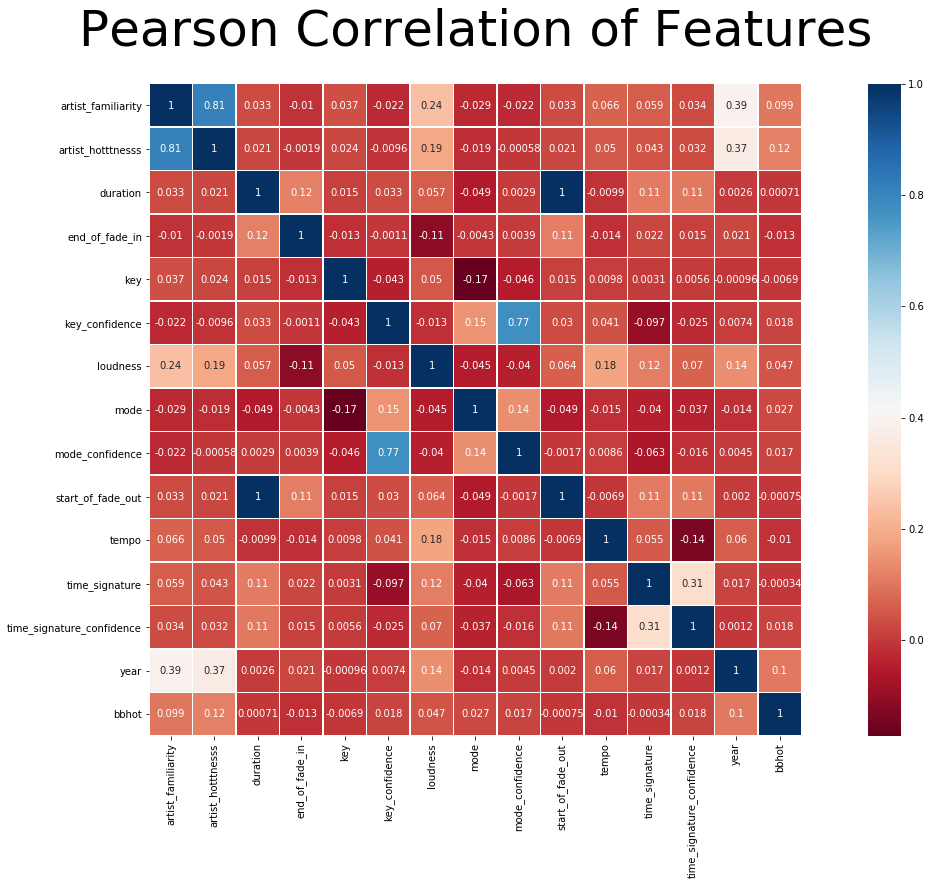

In [18]:
#Looking at the heatmap and check for correlation
drop_list = ['artist_location', 'artist_latitude', 'artist_longitude','artist_name', 'release', 'title' ,'song_hotttnesss', 'artist_id']
trainx = data.drop(drop_list, axis=1)
colormap = plt.cm.RdBu
plt.figure(figsize=(24,12))
plt.title('Pearson Correlation of Features', y=1.05, size=50)
sns.heatmap(trainx.astype(float).corr(),linewidths=0.5,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()